# Testing Tight Divergence on Random MLPs

## Generate a Sequence of Random MLPs

We generate a sequence of $N = 32$ MLPs with the following characteristics:


| Input Shape | (10, 10) |
|------------|----------|
 Max. Num. Layers | 32  |
  Layer Step | 1        |
  Max. Width | 100      |
  Num. Samples | 10000  |
  Num. Classes | 10     |
| Seed | 10 |

Each element of this sequence consists of a pair $\langle \widehat{Z}_i, \widetilde{S}_i \rangle$, where $\widetilde{S}_i$ is the *tight convex approximation* of the MLP $\widehat{Z}_i$. The tight convex approximation is taken with respect to the domain $[-1, 1]^d$, where $d$ is the afore mentioned input shape.


In [1]:
import sys
sys.path.append("..")

import numpy as np
import experiments as exp

In [11]:
## Enable/Disable Titles
show_titles = False

In [2]:
Exp = exp.ConvApproxError(
    [10, 10],               # In. Shape
    31,                     # Max Num. Layers
    1,                      # layer step
    100,                    # max width
    100_000,                 # number of samples
    10,                     # Num. Classes
    0                      # Seed
)
Exp.report()
Exp.report_architectures()

100%|██████████| 30/30 [12:57<00:00, 25.90s/it]

~~ Reporting ~~
Parameters:
_________________________________________________________________
    In. Shape.:        [10, 10]
    Num. Classes (Out. Dim.):10
    Layer Step:        1
    Max. Width:        100
    Num. Samples:      100000
    Seed:              0
    Num. Networks:     100



~~ Architectures ~~
1)  [100, 47, 10]
2)  [100, 50, 67, 10]
3)  [100, 70, 70, 12, 10]
4)  [100, 86, 24, 39, 90, 10]
5)  [100, 73, 91, 91, 15, 61, 10]
6)  [100, 68, 42, 90, 49, 91, 84, 10]
7)  [100, 40, 28, 80, 75, 12, 23, 83, 10]
8)  [100, 72, 82, 50, 67, 85, 91, 52, 32, 10]
9)  [100, 22, 22, 17, 42, 35, 68, 12, 60, 35, 10]
10) [100, 34, 77, 26, 38, 78, 58, 31, 37, 3, 3, 10]
11) [100, 39, 56, 8, 41, 20, 82, 7, 45, 61, 34, 4, 10]
12) [100, 68, 44, 60, 38, 14, 49, 85, 94, 3, 17, 56, 15, 10]
13) [100, 45, 87, 78, 71, 9, 71, 50, 6, 79, 55, 81, 18, 23, 10]
14) [100, 61, 26, 82, 16, 88, 51, 52, 72, 44, 38, 67, 98, 72, 97, 10]
15) [100, 3, 53, 39, 37, 51, 96, 6, 45, 80, 24, 76, 3, 13, 46, 61, 10]
16) [1

## Test on Random MLPs

### Test Divergence

#### Average Tight Divergence

For each of the $N$ randomly generated MLP we compute the average *tight divergence* $\mathcal{A}_i$, as in the formula below:

$$
 \mathcal{A}_i = \frac{1}{\vert D \vert} \sum_{\mathbf{x} \in D } \mathsf{err}_i(\mathbf{x}) = \frac{1}{\vert D\vert}\sum_{\mathbf{x} \in D} \|\widehat{Z}_i(\mathbf{x}) - \widetilde{S}_i(\mathbf{x})\|_\infty
$$

Note that for each pair $\widehat{Z}_i, \widetilde{S}_i$ we use the *same* set of randomly drawn samples $D$. In out case $N = 15$ and $\vert D \vert = 10000$.


In [3]:
avg_tight_divergence =  Exp.comp_avg_tight_divergence()
print(avg_tight_divergence)

100%|██████████| 30/30 [00:00<00:00, 92.39it/s] 

[346.85205078125, 5531.0015625, 30631.446875, 790830.9, 16267670.4, 600450560.0, 328312012.8, 115673622118.4, 3896918425.6, 5851263385.6, 51193914982.4, 4991970862694.4, 497932577433190.4, 2.7975476328120976e+17, 316475282607308.8, 9.686315910171722e+17, 1.10682296778385e+17, 3.795115500146985e+19, 8.455604001880188e+20, 1.167538927989396e+22, 4.54796909089935e+22, 2.1830816567854137e+23, 7.314253352601564e+23, 2.9508474352764446e+25, 8.264337191004656e+29, 4.343053917707359e+29, 3.349071614269014e+26, 6.011897344464421e+32, 1.7075516260476337e+30, 1.3331917881831446e+30]


#### Lower Bound to the Worst Case Divergence

For each of the $N$ randomly generated MLP we compute the *worst case lower bound* $\mathcal{L}_i$ given by the value:

$$
    \mathcal{L}_i = \mathsf{err}_i(\mathbf{0}) = \|\widehat{Z}_i(\mathbf{0}) - \widetilde{S}_i(\mathbf{0}) \|_{\infty}
$$

In [4]:
lb_tight_divergence =  Exp.comp_worst_lb_tight_divergence()
print(lb_tight_divergence)

  3%|▎         | 1/30 [00:00<00:06,  4.47it/s]

  7%|▋         | 2/30 [00:00<00:07,  3.50it/s]

 10%|█         | 3/30 [00:00<00:08,  3.35it/s]

 13%|█▎        | 4/30 [00:01<00:08,  3.14it/s]

 17%|█▋        | 5/30 [00:01<00:08,  3.04it/s]

 20%|██        | 6/30 [00:01<00:08,  2.86it/s]

 23%|██▎       | 7/30 [00:02<00:08,  2.78it/s]

 27%|██▋       | 8/30 [00:02<00:08,  2.62it/s]

 30%|███       | 9/30 [00:03<00:08,  2.40it/s]

 33%|███▎      | 10/30 [00:03<00:08,  2.35it/s]

 37%|███▋      | 11/30 [00:04<00:08,  2.30it/s]

 40%|████      | 12/30 [00:04<00:08,  2.23it/s]

 43%|████▎     | 13/30 [00:05<00:07,  2.13it/s]

 47%|████▋     | 14/30 [00:05<00:07,  2.02it/s]

 50%|█████     | 15/30 [00:06<00:08,  1.74it/s]

 53%|█████▎    | 16/30 [00:07<00:08,  1.75it/s]

 57%|█████▋    | 17/30 [00:07<00:07,  1.63it/s]

 60%|██████    | 18/30 [00:08<00:07,  1.57it/s]

 63%|██████▎   | 19/30 [00:09<00:07,  1.49it/s]

 67%|██████▋   | 20/30 [00:09<00:06,  1.45it/s]

 70%|███████   | 21/30 [00:10<00:06,  1.41it/s]

 73%|███████▎  | 22/30 [00:11<00:05,  1.42it/s]

 77%|███████▋  | 23/30 [00:12<00:04,  1.41it/s]

 80%|████████  | 24/30 [00:12<00:04,  1.39it/s]

 83%|████████▎ | 25/30 [00:13<00:03,  1.32it/s]

 87%|████████▋ | 26/30 [00:14<00:03,  1.27it/s]

 90%|█████████ | 27/30 [00:15<00:02,  1.25it/s]

 93%|█████████▎| 28/30 [00:16<00:01,  1.24it/s]

 97%|█████████▋| 29/30 [00:17<00:00,  1.21it/s]

100%|██████████| 30/30 [00:18<00:00,  1.66it/s]

[456.57516, 6891.561, 64228.76, 957852.2, 20818404.0, 732770050.0, 408953100.0, 180355650000.0, 5936191500.0, 14019804000.0, 101185340000.0, 9524655000000.0, 864094540000000.0, 3.3166122e+17, 407508750000000.0, 1.2502232e+18, 1.47213e+17, 4.8785995e+19, 1.3263712e+21, 1.5898614e+22, 6.9161194e+22, 3.356511e+23, 1.6109213e+24, 3.6487618e+25, 1.04108475e+30, 5.4035172e+29, 5.2861945e+26, 8.9361615e+32, 2.1913703e+30, 2.5468244e+30]


#### Upper Bound to the Worst Case Divergence

For each of the $N$ randomly generated MLP we compute the *worst case upper bound* $\mathcal{U}_i$ given by the value:

$$
    \mathcal{U}_i = \max_{\mathbf{x} \in I} \|\widetilde{S}_i(\mathbf{\mathbf{x}}) \|_{\infty}
$$

Above, $I = [-1, 1]^d$, the input domain.

In [5]:
ub_tight_divergence = Exp.comp_worst_ub_tight_divergence()
print(ub_tight_divergence)

100%|██████████| 30/30 [00:00<00:00, 111.51it/s]

[765.9980852431408, 8993.246496756572, 80751.03930630688, 1056354.280989904, 22386170.721473202, 759167761.6516186, 423797428.0745737, 183108044266.04492, 6060272561.302345, 14414579187.085857, 108258790894.07074, 9757133505693.66, 869460691770019.0, 3.3408056423556934e+17, 416636236983895.75, 1.2769054761442831e+18, 1.502184900548487e+17, 4.87821923626892e+19, 1.342022043763035e+21, 1.610801783376778e+22, 7.191563904189948e+22, 3.28887547344994e+23, 1.6523584818177833e+24, 3.6334829502492653e+25, 1.051175987275878e+30, 5.390333395103347e+29, 5.460804195340447e+26, 9.158160016677635e+32, 2.270275624533042e+30, 2.614970259972207e+30]


#### Plots

In [6]:
import matplotlib.pyplot as plt

## x-axis
layers = [l for l in range(Exp.layer_step, Exp.max_num_layers, Exp.layer_step)]
print("Layers", layers, "-- len:", len(layers))

Layers [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30] -- len: 30


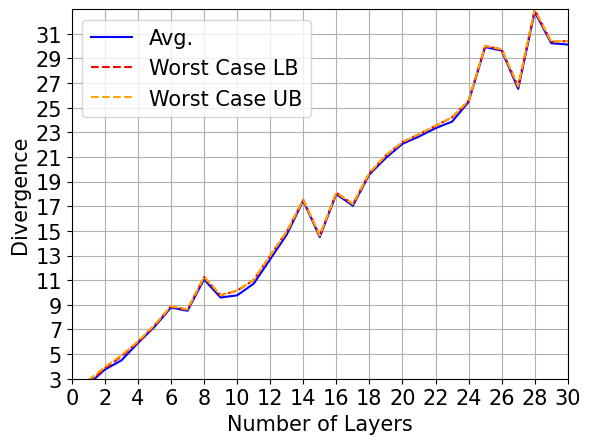

In [12]:
## log plots
plt.rcParams.update({'font.size': 15})

ax = plt.axes()

space=2
#plt.axes().xaxis.set_major_locator(ticker.MultipleLocator(space))

plt.plot(layers, np.log10(avg_tight_divergence),  label="Avg.",           linestyle = "-",    color = "blue")
plt.plot(layers, np.log10(lb_tight_divergence),   label="Worst Case LB",  linestyle = "--",   color = "red")
plt.plot(layers, np.log10(ub_tight_divergence),   label="Worst Case UB",  linestyle = "--",   color = "orange")
#plt.xticks(layers)
plt.legend()
plt.grid(True)
if show_titles: plt.title("Convex Approximation Error\n (Log10 Scale)")
plt.ylabel("Divergence")
plt.xlabel("Number of Layers")

plt.xticks(np.arange(0, 32, space))
plt.yticks(np.arange(3, np.max(np.log10(avg_tight_divergence)), space))
ax.set(xlim=(0, 30), ylim=(3, 33))
plt.show()

Text(0.5, 0, 'Num. Layers')

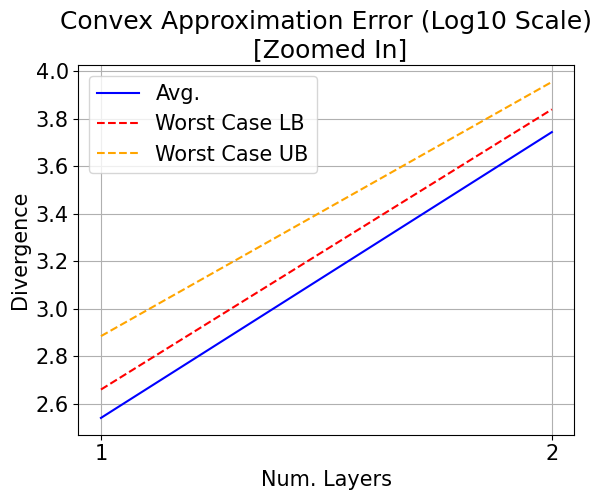

In [8]:
## log plots
min_num_layer_plot = 0
max_num_layer_plot = 2
plt.plot(layers[min_num_layer_plot:max_num_layer_plot], np.log10(avg_tight_divergence[min_num_layer_plot:max_num_layer_plot]),  label="Avg.",           linestyle = "-",    color = "blue")
plt.plot(layers[min_num_layer_plot:max_num_layer_plot], np.log10(lb_tight_divergence[min_num_layer_plot:max_num_layer_plot]),   label="Worst Case LB",  linestyle = "--",   color = "red")
plt.plot(layers[min_num_layer_plot:max_num_layer_plot], np.log10(ub_tight_divergence[min_num_layer_plot:max_num_layer_plot]),   label="Worst Case UB",  linestyle = "--",   color = "orange")
plt.xticks(layers[min_num_layer_plot:max_num_layer_plot])
plt.legend()
plt.grid(True)
plt.title("Convex Approximation Error (Log10 Scale)\n [Zoomed In]")
plt.ylabel("Divergence")
plt.xlabel("Num. Layers")

NameError: name 'ticker' is not defined

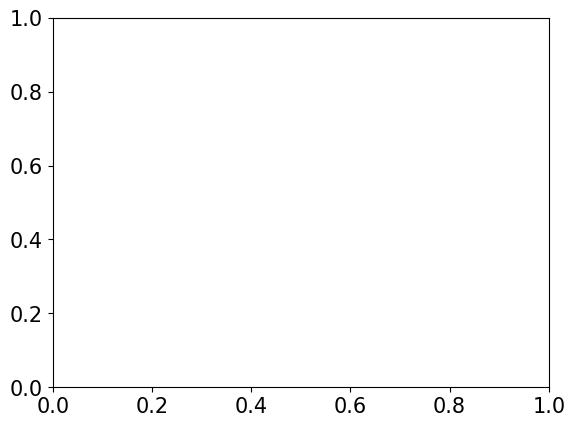

In [9]:
space=2
plt.axes().xaxis.set_major_locator(ticker.MultipleLocator(space))
plt.xticks(np.arange(1, 32, space))
#plt.yticks(np.arange(1, np.max(np.log10(avg_tight_divergence)), space))
plt.plot(layers, np.array(avg_tight_divergence) / np.array(lb_tight_divergence),  label="Avg.", linestyle = "-",    color = "blue")
#plt.xticks(layers)
#plt.legend()
plt.grid(True)
plt.title("Ratio between Avg. Div. and Worst Case LB")
plt.ylabel("Ratio")
plt.xlabel("Num. Layers")

### Test Misclassifications

In this section we compute experimentaly the following probability $Pr[\widetilde{\mathcal{K}}(\mathbf{x}) \neq \widehat{\mathcal{K}}(\mathbf{x})]$.

In [ ]:
avg_misclassifications = Exp.comp_avg_misclassification()
print(avg_misclassifications)
print(Exp.relu_preds[3])
print(Exp.relu_preds.shape)
print(Exp.conv_preds[3])
print(np.array(Exp.relu_scores).shape)
print(Exp.relu_preds[3].shape)

100%|██████████| 30/30 [00:00<00:00, 4257.02it/s]

[0.63906, 0.61644, 0.02166, 0.74188, 0.41742, 0.93239, 0.11159, 0.9655, 1.0, 0.01446, 0.28265, 0.0, 0.0003, 1.0, 1.0, 0.9994, 0.9995, 1.0, 0.97287, 0.0, 0.91273, 0.94504, 0.0, 1.0, 0.52396, 1.0, 0.0, 0.20433, 1.0, 1.0]
[9 8 2 ... 0 8 9]
(30, 100000)
[2 2 2 ... 2 2 2]
(30, 100000, 10)
(100000,)


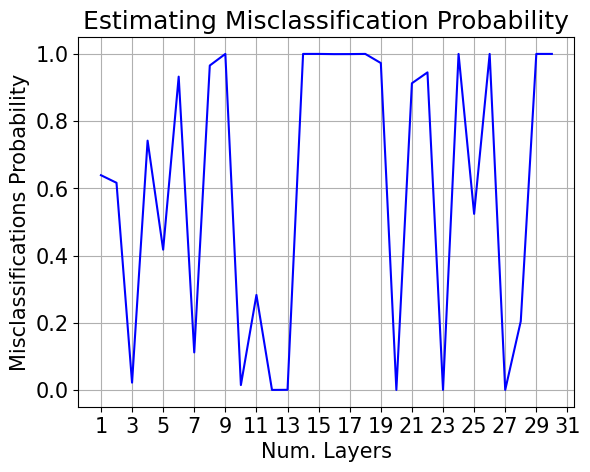

In [ ]:
space=2
plt.axes().xaxis.set_major_locator(ticker.MultipleLocator(space))
plt.xticks(np.arange(1, 32, space))
plt.plot(layers, avg_misclassifications, linestyle = "-", color = "blue")
#plt.xticks(layers)
plt.grid(True)
plt.title("Estimating Misclassification Probability")
plt.ylabel("Misclassifications Probability")
plt.xlabel("Num. Layers")
plt.show()